In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from math import exp, sqrt

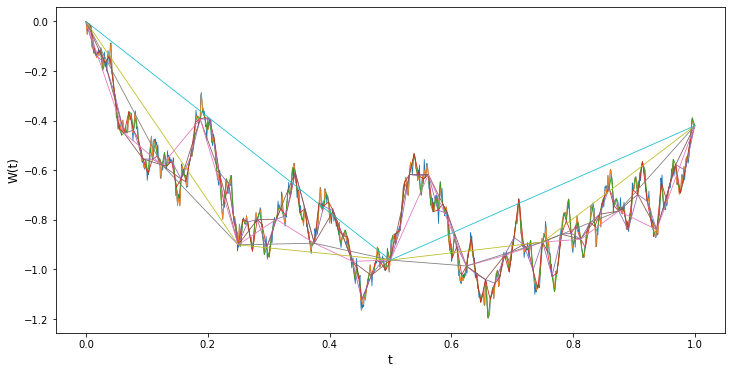

In [277]:
#Q1

i = 10 #all resolutions
N = 2**i #the number of discrete steps
h = 1/N #the variance of the increments

# the epsilon values
noise = np.random.normal(0, np.sqrt(h), N) 

plt.figure(figsize=(12,6))
#calculate a sample path of a Brownian motion at all resolutions
for i in range(i, 0, -1):
    bm = np.cumsum(noise)  # calculate the brownian motion
    bm = np.insert(bm, 0, 0) # insert the initial condition W_0 = 0. for brownian motion
    
    # plot the Brownian motion
    xx = np.linspace(0, 1, 2**i+1)
    noise = noise[1::2] + noise[0::2]
    plt.plot(xx, bm, linewidth=0.8)
    
plt.xlabel('t', fontsize=12)
plt.ylabel('W(t)', fontsize=12)
plt.savefig('bm.pdf');

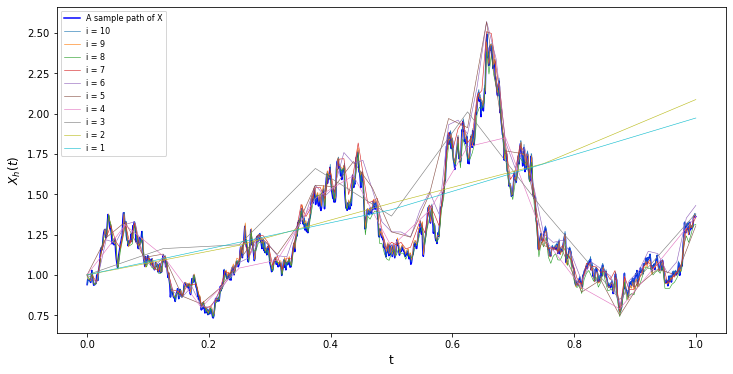

In [387]:
#Q2

mu = sigma = 1
i = 10 #all resolutions
N = 2**i #the number of discrete steps
h = 1/N #the variance of the increments

# the epsilon values
noise = np.random.normal(0, np.sqrt(h), N) 

f = plt.figure(figsize=(12,6))

#a sample path of X
t = np.linspace(0, 1, N)
bm = np.cumsum(noise)
x = np.exp(((mu-(sigma**2/2))*t) + sigma*bm)
#plot the sample path
plt.plot(t, x, linewidth=1.5, c='b', label = 'A sample path of X')

#sample paths of X_hi
for i in range(i, 0, -1):
    bm = np.cumsum(noise)  # calculate the brownian motion; bm
    bm = np.insert(bm, 0, 0) # insert the initial condition W_0 = 0 for brownian motion
    x_h = np.zeros(len(bm))
    x_h[0] = 1
    
    # calculate the different motions for X_hi
    for t in range(1, len(bm)):
        x_h[t] = (1 + mu*2**(-i))*x_h[t-1] + sigma*x_h[t-1]*(bm[t]-bm[t-1])
    # plot each motion
    label = 'i = ' + str(i)
    noise = noise[1::2] + noise[0::2]
    t = np.linspace(0, 1, 2**i+1)
    plt.plot(t, x_h, linewidth=0.6, label = label)


plt.xlabel('t', fontsize=12)
plt.ylabel('$X_{h}(t)$', fontsize=12)
plt.legend(loc = 2, prop={'size': 8})
plt.savefig('sbm.pdf');

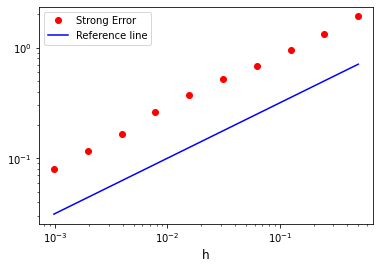

In [347]:
#Q3
M = 1000
mu = sigma = 1
i = 10 #all resolutions
N = 2**i #the number of discrete steps
h = 1/N #the variance of the increments
s = np.zeros(i) #strong error simulation

#Estimate the strong error with a Monte Carlo simulation based on M = 1000
for m in range(M):
    noise = np.random.normal(0, np.sqrt(h), N)
    for j in range(i, 0, -1):
        bm = np.cumsum(noise)  # calculate the brownian motion; bm
        bm = np.insert(bm, 0, 0) # insert the initial condition W_0 = 0 for brownian motion
        x_h = np.zeros(len(bm))
        x_h[0] = 1
        
        # calculate x_1 for the noise
        if j==10:
            x1 = np.exp((mu-sigma**2/2) + sigma*bm[-1])
            
        # calculate the different motions for X_hi
        for t in range(1, len(bm)):
            x_h[t] = (1 + mu*2**(-j))*x_h[t-1] + sigma*x_h[t-1]*(bm[t]-bm[t-1])
        s[j-1] += (x1 - x_h[-1])**2
        noise = noise[1::2] + noise[0::2]
        
        
# calculate strong error
h = [2**-(i+1) for i in range(i)]
strong_error = np.sqrt(s/M)

plt.loglog(h, strong_error, 'ro',label='Strong Error')
plt.loglog(h, np.sqrt(h),'b', label= 'Reference line')
plt.xlabel('h', fontsize=12)
#plt.suptitle('Strong Error Simulation')
plt.legend()
plt.savefig('strong_error.pdf');

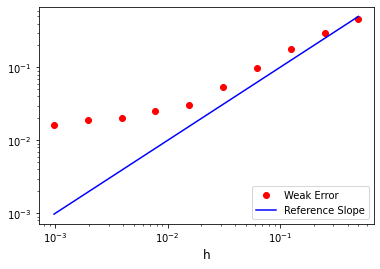

In [378]:
#Q4

M = 1000
mu = sigma = 1
i = 10 #all resolutions
N = 2**i #the number of discrete steps
h = 1/N #the variance of the increments
s = np.zeros(i) #weak error simulation
exp_1 = np.exp(mu)

#Estimate the weak error with a Monte Carlo simulation based on M = 1000
for m in range(M):
    noise = np.random.normal(0, np.sqrt(h), N)

    for j in range(i, 0, -1):
        bm = np.cumsum(noise)  # calculate the brownian motion; bm
        bm = np.insert(bm, 0, 0) # insert the initial condition W_0 = 0 for brownian motion
        x_h = np.zeros(len(bm))
        x_h[0] = 1
            
        # calculate the different motions for X_hi
        for t in range(1, len(bm)):
            x_h[t] = (1 + mu*2**(-j))*x_h[t-1] + sigma*x_h[t-1]*(bm[t]-bm[t-1])
        
        # storing the sum of all points at time 1
        s[j-1] += x_h[-1]
        noise = noise[1::2] + noise[0::2]

# computing weak error
h = [2**-(i+1) for i in range(i)]
weak_error = np.abs(exp_1 - s/M)
    
plt.loglog(h, weak_error, 'ro', label = 'Weak Error')
plt.loglog(h, h, 'b', label = 'Reference Slope')
#plt.suptitle('Weak Error Simulation')
plt.xlabel('h', fontsize=12)
plt.legend(loc = 4)
plt.savefig('weak_error.pdf');

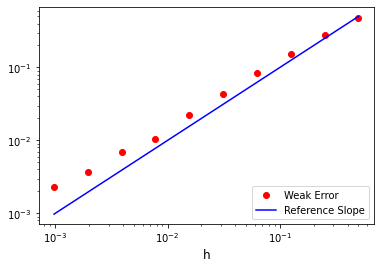

In [4]:
#Q4
#here we try larger M
M = 100000
mu = sigma = 1
i = 10 #all resolutions
N = 2**i #the number of discrete steps
h = 1/N #the variance of the increments
s = np.zeros(i) #weak error simulation
exp_1 = np.exp(mu)

#Estimate the weak error with a Monte Carlo simulation based on M = 1000
for m in range(M):
    noise = np.random.normal(0, np.sqrt(h), N)

    for j in range(i, 0, -1):
        bm = np.cumsum(noise)  # calculate the brownian motion; bm
        bm = np.insert(bm, 0, 0) # insert the initial condition W_0 = 0 for brownian motion
        x_h = np.zeros(len(bm))
        x_h[0] = 1
            
        # calculate the different motions for X_hi
        for t in range(1, len(bm)):
            x_h[t] = (1 + mu*2**(-j))*x_h[t-1] + sigma*x_h[t-1]*(bm[t]-bm[t-1])
        
        # storing the sum of all points at time 1
        s[j-1] += x_h[-1]
        noise = noise[1::2] + noise[0::2]

# computing weak error
h = [2**-(i+1) for i in range(i)]
weak_error = np.abs(exp_1 - s/M)
    
plt.loglog(h, weak_error, 'ro', label = 'Weak Error')
plt.loglog(h, h, 'b', label = 'Reference Slope')
#plt.suptitle('Weak Error Simulation')
plt.xlabel('h', fontsize=12)
plt.legend(loc = 4)
plt.savefig('weak_errorm.pdf');

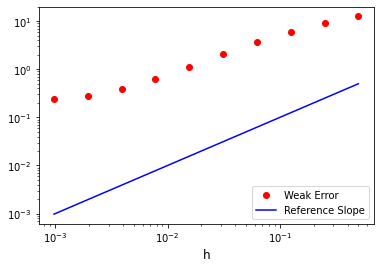

In [59]:
#Q5

M = 100000
mu = sigma = 1
i = 10 #all resolutions
N = 2**i #the number of discrete steps
h = 1/N #the variance of the increments
s = np.zeros(i) #weak error simulation
#exp_1 = (np.exp(mu))

n = 2 # polynomial degree

#Estimate the weak error with a Monte Carlo simulation based on M = 1000
for m in range(M):
    noise = np.random.normal(0, np.sqrt(h), N)

    for j in range(i, 0, -1):
        bm = np.cumsum(noise)  # calculate the brownian motion; bm
        bm = np.insert(bm, 0, 0) # insert the initial condition W_0 = 0 for brownian motion
        x_h = np.zeros(len(bm))
        x_h[0] = 1
            
        # calculate the different motions for X_hi
        for t in range(1, len(bm)):
            x_h[t] = ((1 + mu*2**(-j))*x_h[t-1] + sigma*x_h[t-1]*(bm[t]-bm[t-1]))
        
        #applying a non linear transformation for x_h
        phi_x_h = (x_h**n) 

        # storing the sum of all points at time 1
        s[j-1] += phi_x_h[-1]
        noise = noise[1::2] + noise[0::2]

# computing weak error
h = [2**-(i+1) for i in range(i)]
#non linear transformation for X_1
phi_X_1 = np.exp((n*(mu-sigma**2/2)) + ((n**2)*(sigma**2))/2)
weak_error = np.abs(phi_X_1 - s/M)
    
plt.loglog(h, weak_error, 'ro', label = 'Weak Error')
plt.loglog(h, h, 'b', label = 'Reference Slope')
#plt.suptitle('Weak Error Simulation')
plt.xlabel('h', fontsize=12)
plt.legend(loc = 4)
plt.savefig('phi_error.pdf');